In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

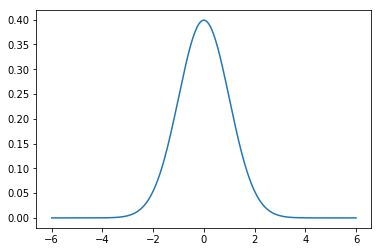

In [7]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs, loc = 0, scale = 1)
plt.plot(xs, normal);

### Leverage

In [26]:
capital_base = 4750

In [27]:
mis_multiplier = 14

In [37]:
stock_price = 195

In [38]:
debt = capital_base * ( mis_multiplier - 1 )

In [39]:
total_fund = mis_multiplier * capital_base

In [40]:
mis_qty = math.floor(total_fund/stock_price)

In [41]:
mis_qty

341

In [42]:
total_fund

66500

In [61]:
def mis_trade(capital_base, mis_multiplier, stock_price, buy_qty):
    debt = capital_base * ( mis_multiplier - 1 )
    total_fund = mis_multiplier * capital_base
    max_mis_qty = math.floor(total_fund/stock_price)
    if buy_qty > max_mis_qty:
        print("Cannot buy ",buy_qty," stocks!")
        print("Only ",max_mis_qty," stocks can be bought with margin!")
    else:
        total_exp = round(buy_qty * stock_price,2)
        cb_exp = round(total_exp / mis_multiplier,2)
        cb_bal = round(capital_base - cb_exp,2)
        print("Funds: ", capital_base)
        print("With leverage: ", total_fund)
        print("Stock price: ",stock_price)
        print("Stocks bought: ", buy_qty)
        print("Maximum possible MIS Quantity: ", max_mis_qty)
        print("Total Expenditure: ", total_exp)
        print("Capital Base Expenditure: ", cb_exp)
        print("Remaining Funds", cb_bal)

In [64]:
mis_trade(932, 9, 1700, 4)

Funds:  932
With leverage:  8388
Stock price:  1700
Stocks bought:  4
Maximum possible MIS Quantity:  4
Total Expenditure:  6800
Capital Base Expenditure:  755.56
Remaining Funds 176.44


In [66]:
import pandas as pd
nifty = pd.read_csv("nifty_1_year.csv")
lupin = pd.read_csv("lupin_1_year.csv")

In [74]:
nifty.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')

In [75]:
lupin.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades'],
      dtype='object')

In [76]:
df=pd.merge( nifty , lupin,on=['Date'])

In [82]:
import numpy as np

In [98]:
nifty_c = np.array(df["Close"])
nifty_jumps = np.diff(nifty_c)

In [89]:
lupin_c = np.array(df["Close Price"])

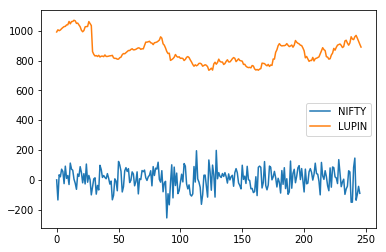

In [99]:
plt.plot(nifty_jumps, label = "NIFTY")
plt.plot(lupin_c, label = "LUPIN")
plt.legend()